## EDA Sierra Leone
This notebook performs exploratory data analysis (EDA) on the wind and solar dataset of Sierra Leone, using the reusable functions from ```data_prep_clean.py``` and ```eda_plots.py``` to ensure clean, consistent, and reproducible results.

## Imports

In [1]:
import sys
import pandas as pd;

sys.path.append('../../scripts')


from data_prep_clean import DatasetHandler

from eda_plots import EDAHandler

## Load Raw Data

In [2]:
raw_file_path = "../../data/sierra-leone/sierraleone-bumbuna.csv"
output_dir = "../../data/sierra-leone/"

handler = DatasetHandler(raw_file_path)
df = handler.load_data()


✅ 'Timestamp' column successfully converted to datetime objects.


## Observe the Data

In [3]:
print("## 📊 Head: First 5 Rows for Visual Check\n")
df.head()

## 📊 Head: First 5 Rows for Visual Check



,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
print("## ℹ️ Info: Data Types, Non-Null Counts, and Memory Usage\n")
df.info()

## ℹ️ Info: Data Types, Non-Null Counts, and Memory Usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64        

The raw dataset includes columns like GHI, DNI, DHI, ModA, ModB, WS, WSgust, WD, Tamb, RH, and Timestamp. Some columns may have missing values and potential outliers.

## Summary Statistics & Missing-Value Report

In [5]:
handler.get_summary_report()


--- 1. Summary Statistics ---
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     201.957515     116.376337   
min              2021-10-30 00:01:00     -19.500000      -7.800000   
25%              2022-01-29 06:00:45      -2.800000      -0.300000   
50%              2022-04-30 12:00:30       0.300000      -0.100000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     298.495150     218.652659   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      113.720571     206.643095     198.114691      26.319394   
min       -17.900000       0.000000       0.000000      12.300000   
25%        -3.800000       0.000000       0.000000      23.100

We can see which columns have high missing values (>5%) and examine summary statistics for numeric columns. This identifies potential cleaning needs.

The Comments column contained 100% missing values, providing no useful information for analysis. Therefore, it was dropped to clean the dataset and simplify further processing.

In [6]:
# Drop the 'Comments' column from the internal DataFrame
handler.df = handler.df.drop(['Comments'], axis=1).copy()

print("✅ 'Comments' column dropped due to 100% missing values.")
print("-" * 50)
print("After Dropping 'Comments' Column:")
handler.df.head()


✅ 'Comments' column dropped due to 100% missing values.
--------------------------------------------------
After Dropping 'Comments' Column:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6


Negative solar radiation readings correspond to nighttime hours (when the sun isn’t shining). These values are physically meaningless for solar analysis, so they’re excluded to focus on daytime data only.

In [7]:
# Remove negative solar radiation values (GHI, DNI, DHI)
solar_cols = ['GHI', 'DNI', 'DHI']

# Count how many negative values exist before removal
negative_counts = (handler.df[solar_cols] < 0).sum()
print("Negative value count before removal:\n ", negative_counts)

# Remove rows where any solar column is negative
handler.df = handler.df[(handler.df[solar_cols] >= 0).all(axis=1)]

# Reset index after filtering
handler.df = handler.df.reset_index(drop=True)

print(f"\nData shape after removing negatives: {handler.df.shape}")



Negative value count before removal:
  GHI    261135
DNI    266352
DHI    263128
dtype: int64

Data shape after removing negatives: (238872, 18)


## Outlier Detection

In [8]:
# Flag outliers using the class method
handler.calculate_zscore_and_flag_outliers()

# Access the flagged rows
outlier_rows = handler.df[handler.df['Outliers_Flag'] == True]
print("Count of rows with outlier values - ", handler.df['Outliers_Flag'].sum())
print(outlier_rows.head(5))



🔹 Calculating Z-scores and flagging outliers for the following columns:
   ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

📈 ModA Specific Outliers (|Z| > 3): 33
📉 ModB Specific Outliers (|Z| > 3): 51

✅ Total rows flagged (at least one column |Z| > 3): 1760
Count of rows with outlier values -  1760
               Timestamp   GHI  DNI   DHI  ModA  ModB  Tamb    RH   WS  \
1265 2021-10-31 17:36:00  35.2  3.6  34.3  35.1  33.1  31.2  66.8  7.5   
1266 2021-10-31 17:37:00  28.9  0.3  29.0  30.8  29.0  30.9  66.7  6.2   
1267 2021-10-31 17:38:00  26.0  0.2  26.2  29.3  27.8  30.6  63.6  5.2   
1268 2021-10-31 17:39:00  24.6  0.2  24.8  28.9  27.4  30.2  63.6  5.3   
1269 2021-10-31 17:40:00  23.9  0.2  24.3  29.4  28.0  29.9  64.5  5.3   

      WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
1265     9.7      1.3  138.2     27.2  999         0            0.0   37.6   
1266     7.9      0.9  111.9     15.5  999         0            0.0   36.4   
1267     7.2 

## Cleaning & Imputation

In [9]:
columns_to_impute = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'WS', 'WSgust', 'RH']

# Clean outliers and impute missing values
handler.clean_and_impute(columns_to_impute)

# Save the cleaned data
cleaned_file_path = output_dir + "sierra_leone_clean.csv"
handler.save_cleaned_data(cleaned_file_path)


🔹 Replacing outliers with median for the following columns:
   ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'WS', 'WSgust', 'RH']
🔹 Imputing remaining missing values with median for key columns.
✅ Outliers replaced and missing values imputed.

✅ Cleaned Data Saved successfully to: ../../data/sierra-leone/sierra_leone_clean.csv


## Load Cleaned data

In [10]:
cleaned_file_path = output_dir + "sierra_leone_clean.csv"

# Create an instance of the EDAHandler class
eda = EDAHandler(cleaned_file_path)

# Load the cleaned data
df_cleaned = eda.load_data()

# Inspect the first rows
df_cleaned.head()


✅ 'Timestamp' column successfully converted to datetime objects.


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 07:13:00,17.7,0.0,17.7,20.1,19.2,22.0,98.6,0.2,0.7,0.4,212.8,2.6,1003,0,0.0,22.5,22.9
1,2021-10-30 07:14:00,18.3,0.0,18.3,20.7,19.9,22.0,98.5,0.1,0.7,0.3,221.4,0.4,1003,0,0.0,22.5,22.9
2,2021-10-30 07:15:00,18.9,0.0,18.9,21.4,20.5,22.0,98.6,0.2,0.7,0.5,189.1,6.1,1003,0,0.0,22.6,22.9
3,2021-10-30 07:16:00,19.5,0.0,19.5,22.0,21.1,22.0,98.6,0.4,1.4,0.6,199.4,5.8,1003,0,0.0,22.6,22.9
4,2021-10-30 07:17:00,20.1,0.0,20.1,22.7,21.8,22.0,98.5,0.1,1.1,0.3,192.0,1.0,1003,0,0.0,22.6,22.9


## Time Series Analysis

Requirement: Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp.

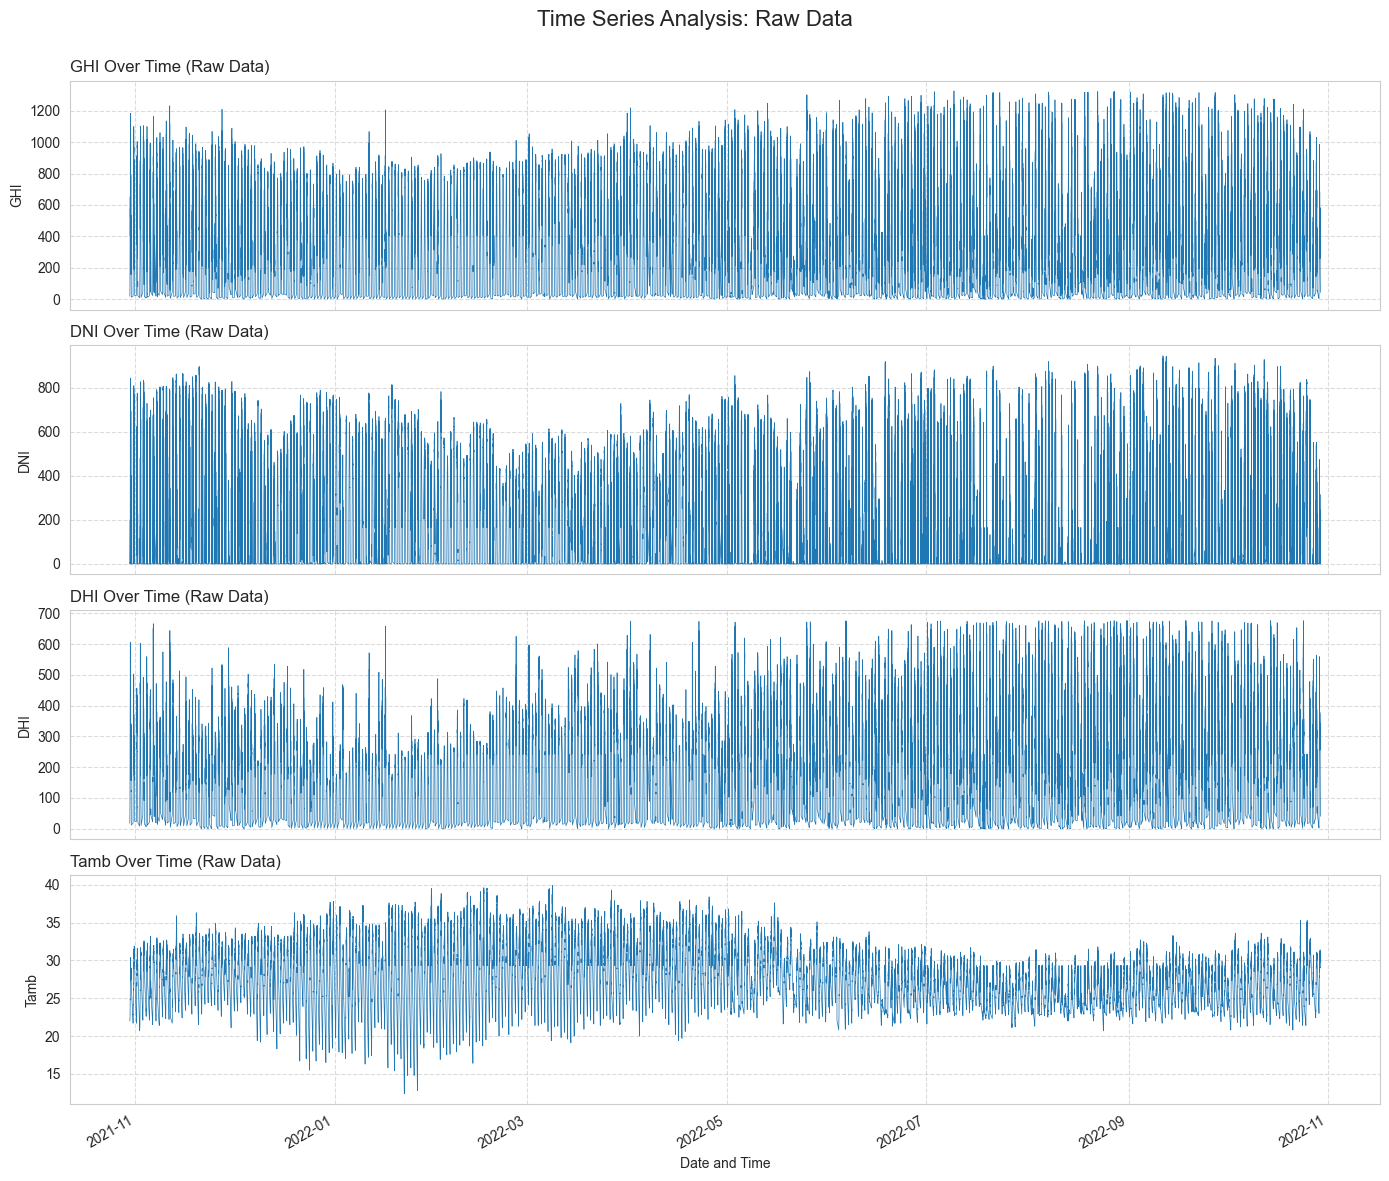

In [11]:
eda.plot_time_series()

## Cleaning Impact

Requirement: Group by Cleaning flag and plot average ModA & ModB pre/post-clean.

✅ 'Timestamp' column successfully converted to datetime objects.

--- 🧑‍💻 Preparing DataFrames for Cleaning Impact Analysis ---
✅ Combined DataFrame created with 764472 rows for comparison.

--- Plotting Cleaning Impact Analysis ---

Average Values by Cleaning Flag:
                 ModA        ModB
Cleaning                        
0         206.643095  198.114691
1         448.234472  429.696443


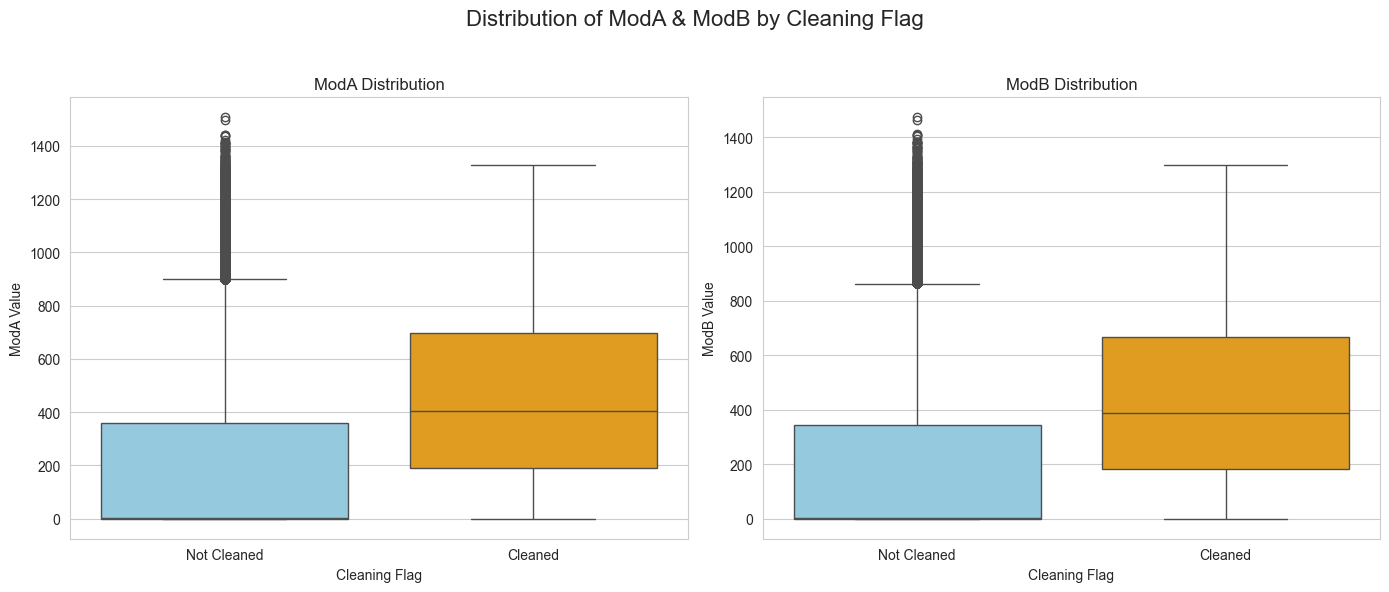

✅ 'Timestamp' column successfully converted to datetime objects.


In [12]:

# Temporarily load raw data into eda.df
eda.file_path = raw_file_path
_ = eda.load_data() 

# Prepare data: eda.df is raw, df_cleaned  is clean
df_combined_for_impact = eda.prepare_impact_data(df_cleaned)

# Plot the comparison
if df_combined_for_impact is not None:
    eda.plot_cleaning_impact(df_combined_for_impact)

# Restore eda.df to cleaned data for subsequent cells
eda.file_path = cleaned_file_path
_ = eda.load_data()

# Correlation and Relationship Analysis

### Correlation Heatmap

Requirement: Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).


--- Plotting Correlation Heatmap ---


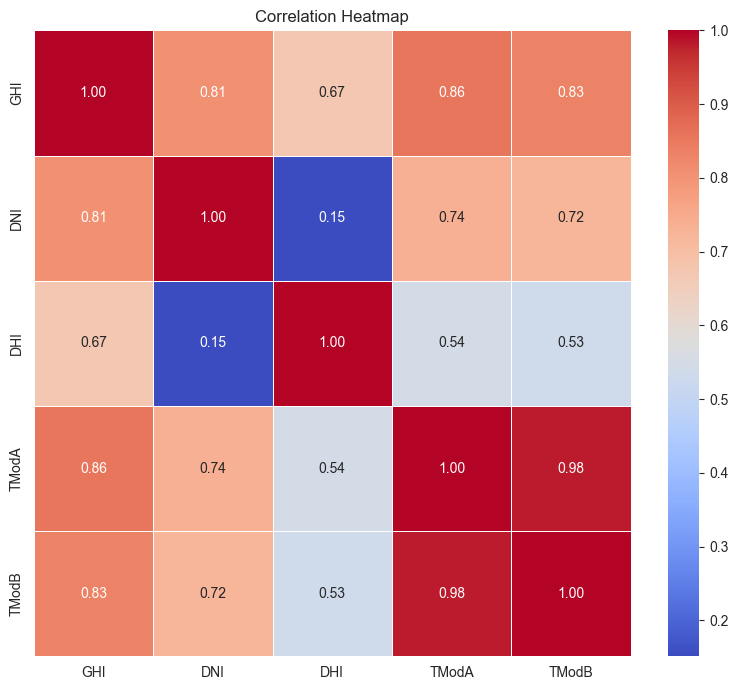

In [13]:
eda.plot_correlation_heatmap()

#### Scatter Plots

Requirement: Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.


--- Plotting Relationship Scatter Plots ---


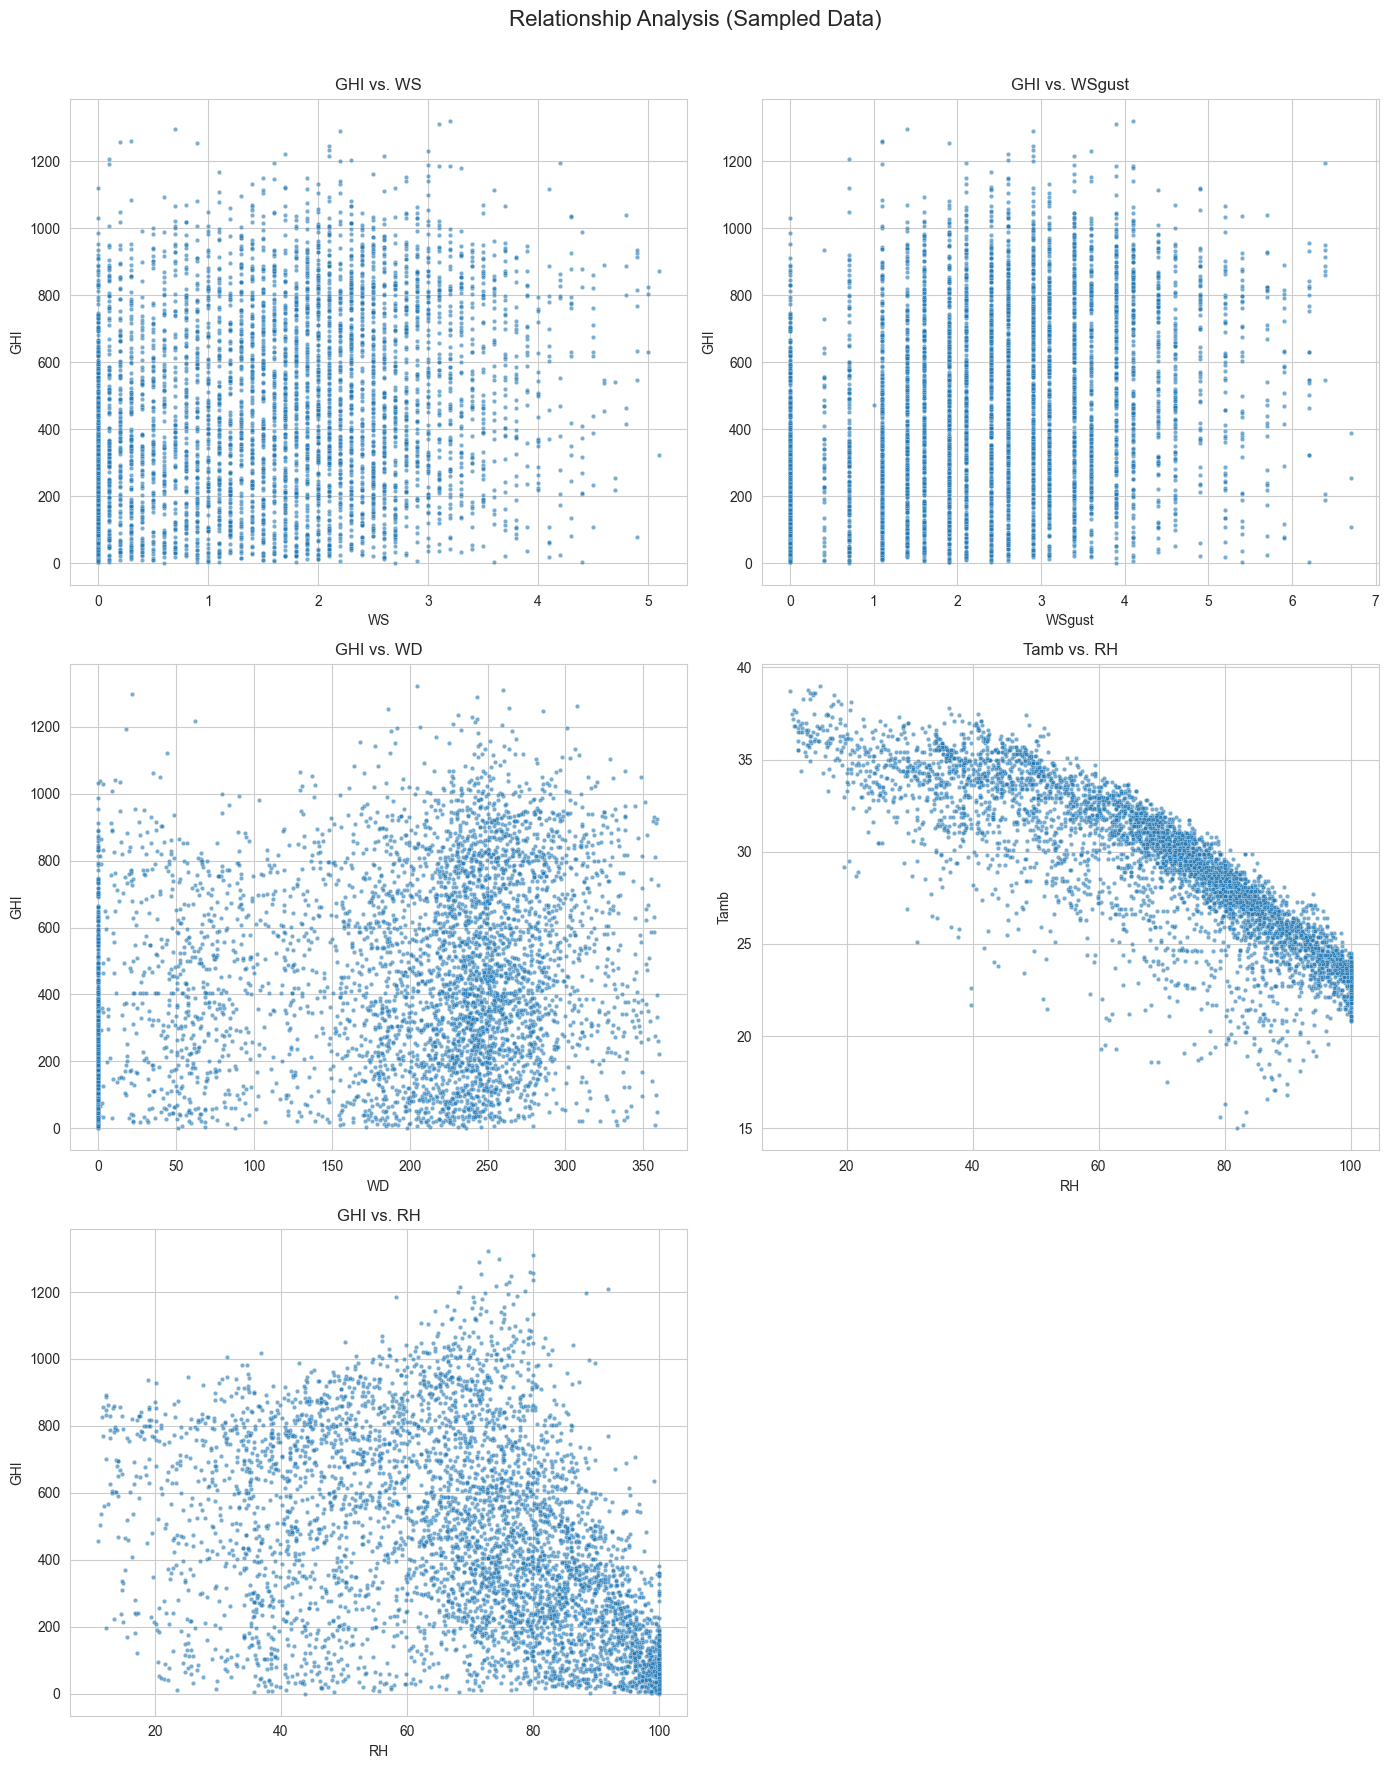

In [14]:
eda.plot_scatter_relationships()

## Wind & Distribution Analysis

Requirement: Wind rose or radial bar plot of WS/WD and Histograms for GHI and one other variable (WS).


--- Plotting Distribution Histograms ---


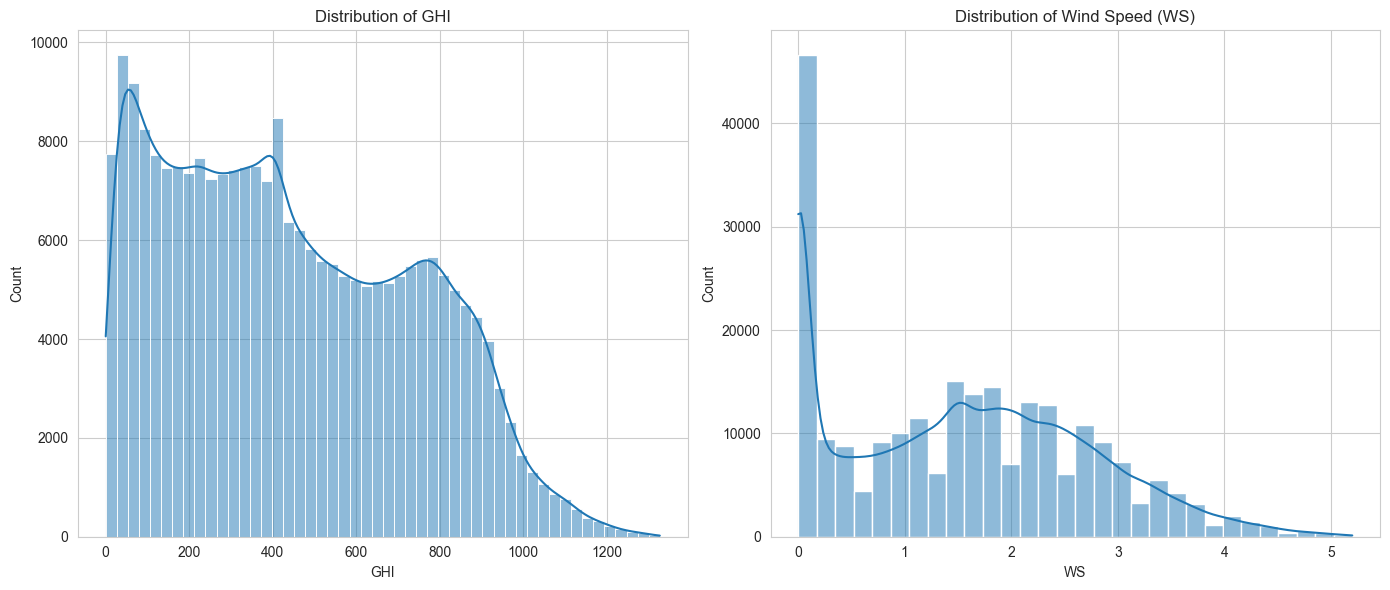


--- Plotting Wind Rose ---


<Figure size 800x800 with 0 Axes>

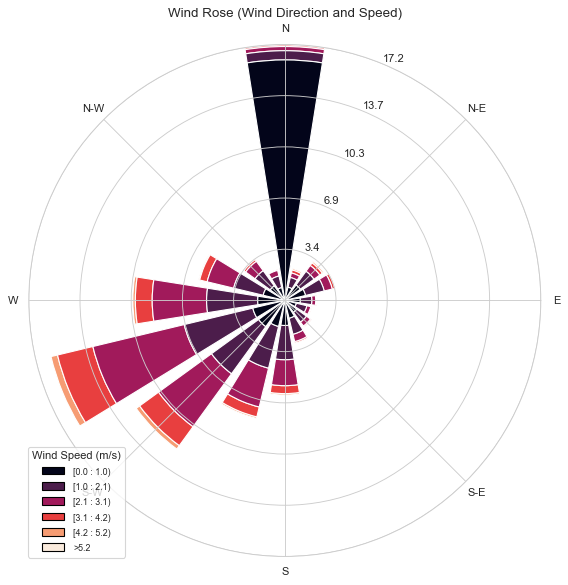

In [15]:
eda.plot_wind_and_distribution()

### Temperature Analysis & Bubble Chart
Requirement: Examine how relative humidity (RH) might influence temperature readings and solar radiation, visualized using a Bubble Chart (GHI vs. Tamb with bubble size = RH).


--- Plotting Bubble Chart (GHI vs. Tamb, Size = RH) ---


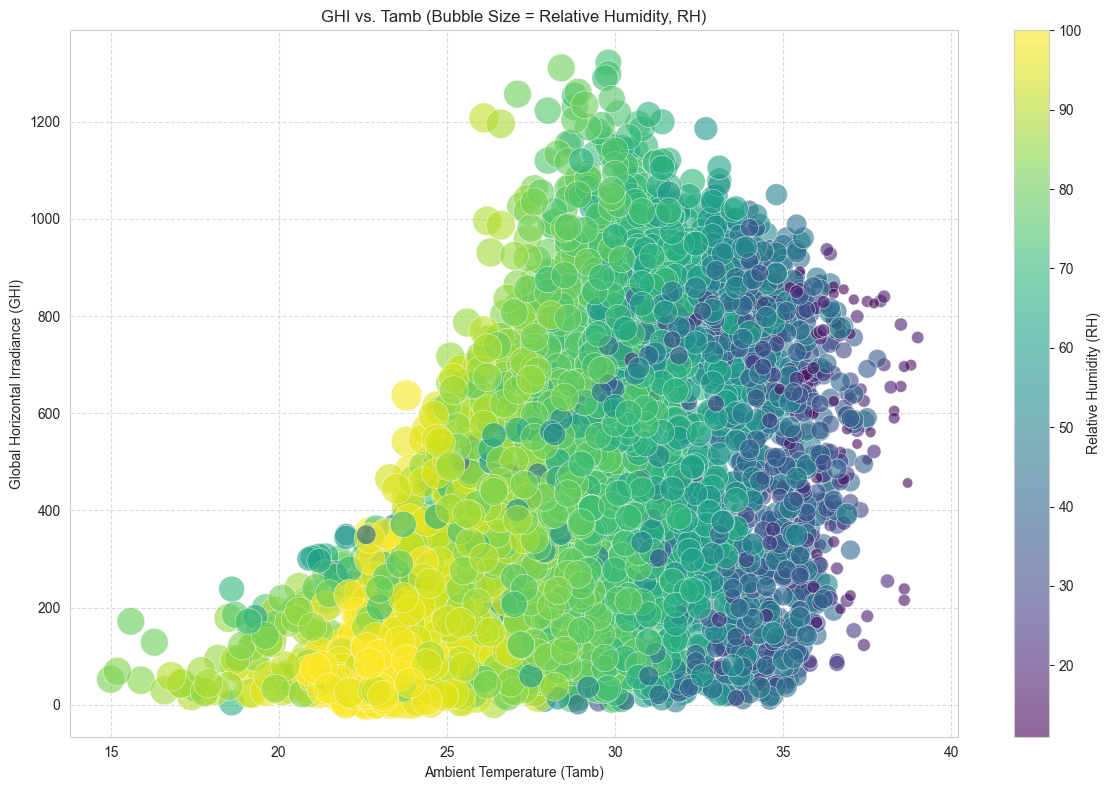

In [16]:
eda.plot_bubble_chart()